### **0. Preparation**

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
from collections import deque
from google.colab import files

### **1. Input Data**

In [3]:
uploaded = files.upload()

Saving data.csv to data.csv


Xdata [-5.51841   7.063695 -8.515615 -4.962353 -4.435724 -0.29148  -7.339271
 -8.337907 -0.713295  2.556061  0.29803   3.6728    6.873527 -8.24238
  3.998053  9.35772   0.877679  2.345416 -5.0447   -7.029398 -5.895779
 -0.13343   9.834972 -1.894317 -1.073538  2.86152   6.164132 -7.026815
  7.587202 -7.227354  7.695566 -2.260948  0.30004  -6.738492 -4.305996
 -2.487189 -0.262987 -2.291354  1.264063  9.463463 -0.673274 -3.482189
  3.812971 -1.401059  6.05747  -3.05823  -6.893029  6.331832 -6.655075
 -5.077752  7.729958 -7.886256  4.527354 -5.78156  -7.051457 -8.536001
  4.837595 -8.970239 -9.759525  0.356261  7.239314 -5.430588 -8.443497
 -8.154226  4.861183  7.47162  -4.420365 -5.974326 -4.714637  2.730478
 -0.926356  3.177222 -1.532063  6.43198  -3.330694 -2.925649 -5.742453
 -0.341591  0.07179  -4.877027 -2.208828 -8.381641 -0.302641  5.386828
 -9.857524  6.182947 -5.644797  4.843028  5.770952 -8.22628   0.652588
 -6.057976  5.083135  0.469349  2.878633  5.530495 -6.177397  4.513441
 

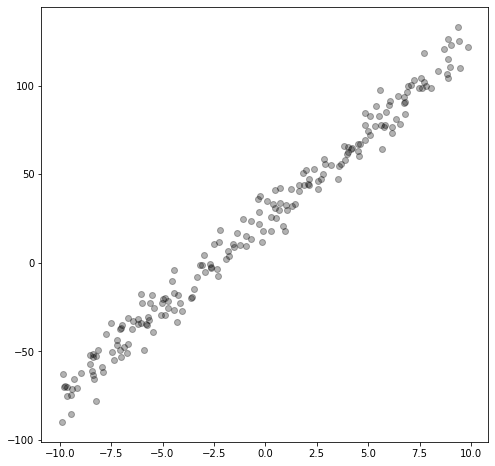

In [43]:
dataset = np.loadtxt("data.csv", delimiter = ",")

x_data = dataset[:,0]
y_data = dataset[:,1]
size_data = len(x_data) #200
#print("Xdata",x_data)
#print("Ydata", y_data)
plt.figure(figsize = (8,8))
plt.scatter(x_data, y_data, alpha = 0.3, color = 'k')
plt.show()

### **2. Linear Regression**

In [0]:
def ObjectiveFunction(m, b):
  #print(m)
  cost = 0
  predictions = []
  for i in range(0, 200):
    predictions.append(m * x_data[i] + b)
    #print("m의 값",m)
    #r = y_data[i]
  cost = np.sum(np.square(predictions - y_data)) / 400
  #print("Cost",i,"번째",cost)
  return cost

In [0]:
def gradientDescent(m, b):
  for i in range(0, 200):
    h = m * x_data[i] + b
    #r = y_data[i]
    lr = 0.01
    b -= lr * (h - y_data[i]) / 200
    m -= lr * x_data[i] * (h-y_data[i]) / 200
  return m, b

Plotting the Output Results


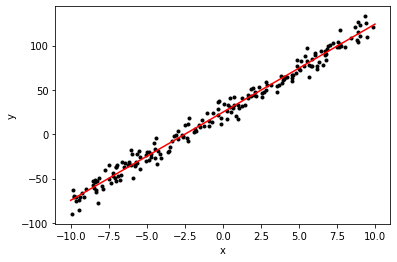

Plotting the Energy Values


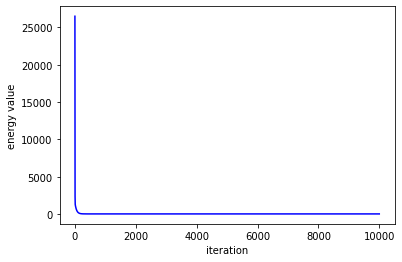

Plotting the Model Parameters


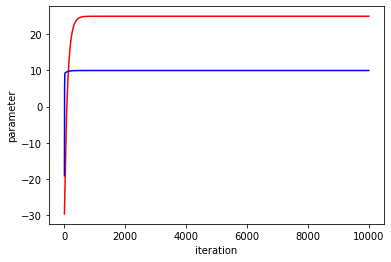

In [78]:
def main():
  #print("x", x)
  #print("y", y)
  m = -30
  b = -30   ##initialization
  costs = deque()
  bs = deque()
  ms = deque()
  iters = deque()

  for iter in range(0, 10000):
    value_Object = ObjectiveFunction(m, b)
    m, b = gradientDescent(m, b)
    #print("cost", value_Object)
    #print("절편b",b)
    #print("기울기m",m)

    #data수집을 위해 deque 자료구조를 이용해 저장!
    iters.append(iter)
    costs.append(value_Object)
    bs.append(b)
    ms.append(m)

  #print("iters, costs, ms, bs",iters, costs, ms, bs)
  #print("m, b",m,b)

  print("Plotting the Output Results")
  fig = plt.figure()

  graph3 = plt.plot(x_data, y_data, '.k') #기존 data

  real = np.linspace(-10,10,21)
  graph4 = plt.plot(real, m * real + b, 'r') #linear regression
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  print("Plotting the Energy Values")
  plt.plot(iters, costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('energy value')
  plt.show()

  print("Plotting the Model Parameters")
  fig = plt.figure()
  graph5 = plt.plot(iters, bs, 'r')
  graph6 = plt.plot(iters, ms, 'b')
  plt.xlabel('iteration')
  plt.ylabel('parameter')
  plt.show()

if __name__ == "__main__":
  main()